In [22]:
import os
import glob
import numpy as np
import cv2
import torch
import torchvision
import scipy.io as sio
import matplotlib.pyplot as plt
import argparse

import gan_helpers.dataloader as dl
import gan_helpers.gan as gan

In [23]:
def load_dataset(data_dir):
    ct = torchvision.transforms.Compose([dl.ToTensor()])

    dataset_list = []
    dataset_list_test = []

    i = 0
    while True:
        img_dir = os.path.join(data_dir, f"{i:03d}")
        if not os.path.exists(img_dir):
            break
        else:
            i += 1
        
        if i % 5 != 4:
            dataset_list.append(dl.GetSampleBatch(img_dir, ct, bsize=16))
        else:
            dataset_list_test.append(dl.GetSampleBatch(img_dir, ct, bsize=16))

    return dataset_list, dataset_list_test

In [24]:
left_data = os.path.join("data", "left_data")
dataset_list, dataset_list_test = load_dataset(left_data)
train_dataset = torch.utils.data.ConcatDataset(dataset_list)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)

In [25]:
sample = next(iter(train_loader))

In [26]:
print(sample.keys())

dict_keys(['noisy_imgs', 'clean_imgs', 'exp'])


In [27]:
sample_noisy = sample["noisy_imgs"]
sample_clean = sample["clean_imgs"]
sample_exp = sample["exp"]

print(sample_noisy.shape)
print(sample_clean.shape)
print(sample_exp.shape)

torch.Size([1, 16, 1, 480, 640])
torch.Size([1, 16, 1, 480, 640])
torch.Size([1])


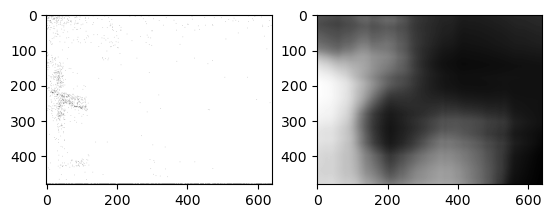

In [28]:
# Show the noisy and clean images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(sample_noisy[0, 0, 0].numpy(), cmap="gray")
ax[1].imshow(sample_clean[0, 0, 0].numpy(), cmap="gray")
plt.show()


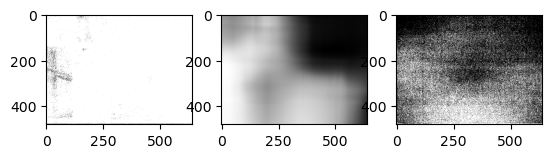

In [35]:
direct_path = os.path.join("data", "left_data", "008")
clean_img = np.load(os.path.join(direct_path, "clean.npy"))
noisy_img = np.load(os.path.join(direct_path, "noisy0000.npy"))
fwc = np.load(os.path.join("data", "left_data", "fwc.npy"))
# Plot the clean and noisy images
fig, ax = plt.subplots(1, 3)
ax[0].imshow(noisy_img, cmap="gray")
ax[1].imshow(clean_img, cmap="gray")
ax[2].imshow(fwc, cmap="gray")
plt.show()

In [7]:
params_path = "./data/left_save/left_params.mat"
params = sio.loadmat(params_path)

In [8]:
cat_params = {**params, **params}
sio.savemat(os.path.join("data", "temp_params.mat"), cat_params)

In [9]:
params.keys()

dict_keys(['__header__', '__version__', '__globals__', 'left_fwc', 'left_g', 'left_h', 'left_shot', 'left_read', 'left_row', 'left_rowt', 'left_quant', 'left_dark'])

In [12]:
params["left_rowt"].shape

(1, 1)

In [15]:
# Generate a gray image
gray = np.ones((480, 640), dtype=np.uint8) * 128
# Save to "./inputs/gray.png"
cv2.imwrite(os.path.join("inputs", "gray.png"), gray)

True